# Theta Model Forecaster [work in progress]

The theta model is a forecasting method presented by V. Assimakopoulos and K. Nikolopoulos. The basic idea behind this method is the decomposition of the original time series into **short and long term components**. Other popular methods decompose time series into a seasonal, a trend and an error component. However, the Theta Model produces new time series by modifying the **second order difference** of the original time series by multiplying it by a real value, called theta. Then, we produce forecasts for each of the underlying time series components (**extrapolation**) and finally we **combine** all forecasts to obtain the final forecast for the original time series.

## 0. Preliminaries

In this tutorial we will forecast shampoo sales. This dataset describes the monthly number of sales of shampoo over a 3 year period. The units are a sales count.

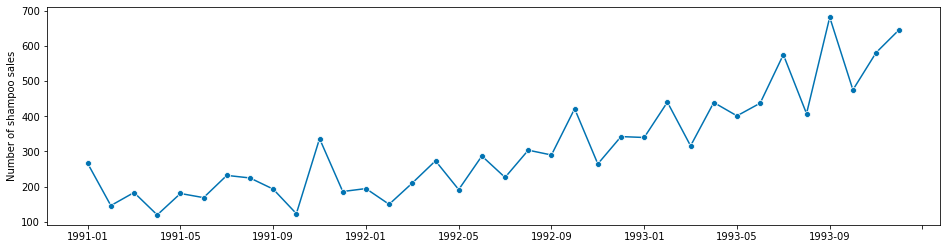

In [1]:
from sktime.datasets import load_shampoo_sales
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
X = load_shampoo_sales()
fig, ax =  plot_series(X)

## 1. Understanding theta lines

* Explain how we modify the local curvatures of the original time series
* Explain and give the definition of second order difference

In [2]:
x = X.values

In [3]:
def get_x_data(x):
    return x[2:]-2*x[1:-1]+x[:-2]

Grzegorz Dudek 1 paper
* Equation of the theta line
* Analytical solution of the equation of the minimization problem 
* formulas for computing a and b

In [4]:
def get_theta_line(x, theta):
    n = len(x)
    b = (6/(n*n -1))*((2/n)*np.dot(x, np.arange(1, len(x)+1)) 
                     - ((1+n)/n)*np.sum(x))
    a = (1/n)*np.sum(x)-((n+1)/2)*b
    z_t = theta*x +(1-theta)*(a+b*np.arange(1,n+1))
    return z_t

In [5]:
theta_values = [0, 0.5, 1,  2]
z_lines = []
legend = ["original time series"]
for z in theta_values:
    legend.append("theta line with theta = {}".format(z))
    z_lines.append(pd.Series(get_theta_line(x,z ), index = X.index))

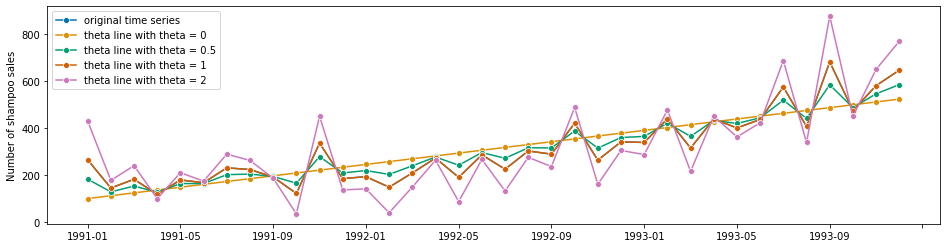

In [6]:
x_data = get_x_data(x)
theta = 1

fig, ax =  plot_series(X, z_lines[0], z_lines[1], z_lines[2], z_lines[3], labels=legend)

## 2. Theta Model pipeline
Explain complete pipeline of the model:
* Deseasonalization
* Decomposition
* Extrapolation
* Combination
* Reseasonalization